# S04 T02: Visualització gràfica de Múltiples variables

In [608]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')

%matplotlib inline

## Exercici 2: Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [609]:
movies = pd.read_csv("/Users/deliagonzalezmata/Documents/IT_Academy/Sprint_4/S04_T02/Data-Science/Pre-processing-data/movies.dat", 
                    sep="::", header=None, 
                    names=["Num","Títol", "Gènere"]) 

# preparem el data set: 
movies = movies.drop("Num", 1)

movies['Any'] = movies['Títol'].str.extract(r'\((\d{4})\)')
movies.replace('\(\d{4}\)', '', regex=True, inplace=True)
movies['Any'] = pd.to_numeric(movies['Any'])



movies.head()

,Títol,Gènere,Any
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


In [610]:
movies.shape

(3883, 3)

In [611]:
movies.ndim

2

In [612]:
movies.columns

Index(['Títol', 'Gènere', 'Any'], dtype='object')

In [613]:
movies.dtypes

Títol     object
Gènere    object
Any        int64
dtype: object

### <span style=color:purple>Pel•lícules per any</span>

In [614]:
pelis_per_any = movies['Any'].value_counts()
pelis_per_any = pelis_per_any.sort_index()

pelis_per_any

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: Any, Length: 81, dtype: int64

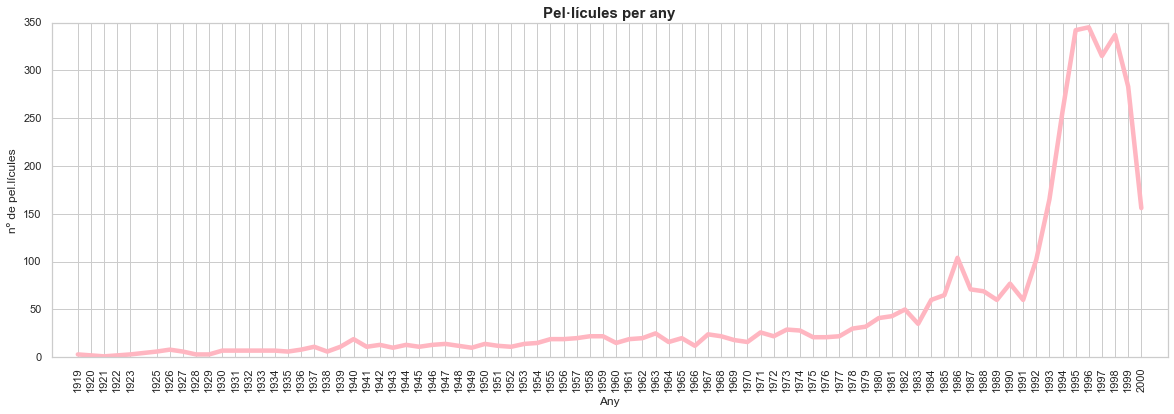

In [615]:
fig,ax = plt.subplots(figsize=(20,6))

sns.lineplot(data = pelis_per_any, x=pelis_per_any.index, 
             y=pelis_per_any.values, color = 'lightpink', 
             linewidth = 4.5, ax=ax)

ax.ticklabel_format(useOffset=False, style='plain')
plt.title('Pel·lícules per any', fontweight = 'bold', size = 15)
ax.ticklabel_format(axis='both',useOffset=None)
plt.xlim(1917, 2002)
plt.xticks(pelis_per_any.index, rotation =90)
ax.set_xlabel('Any')
ax.set_ylabel('nº de pel.lícules')
plt.show()

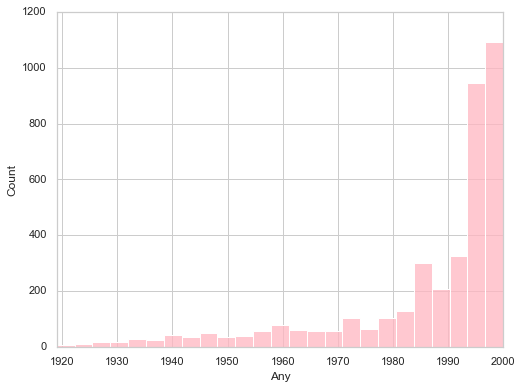

In [616]:
# HISTOGRAMA: 
fig,ax = plt.subplots(figsize=(8,6))

sns.histplot(data=pelis_per_any, x=movies['Any'], color ='lightpink', bins = 25)
ax.ticklabel_format(useOffset=False, style='plain')
plt.xlim(1919, 2000)
plt.show()

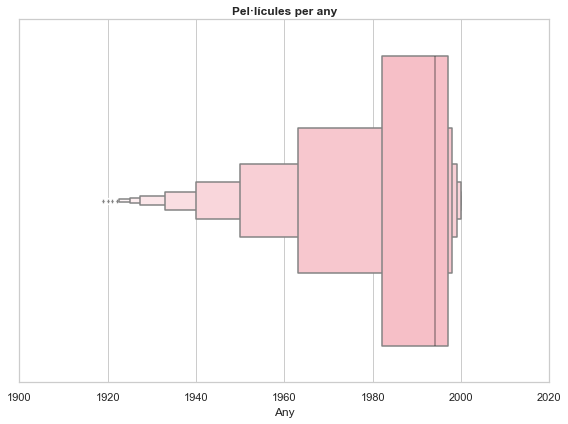

In [617]:
fig, ax = plt.subplots(figsize=(8,6))

sns.boxenplot(data=movies, x="Any", ax=ax, color = 'lightpink')

plt.title('Pel·lícules per any', fontweight = 'bold')
ax.set_xlabel('Any')

plt.tight_layout()
plt.show()

### <span style=color:purple>Pel•lícules per gènere</span>

In [618]:
def checkForGenre(series, name):
    list1 = []
    for i in series:
        if name in i:
            list1.append(1)
        else:
            list1.append(0)
    return list1

def getListOfUniqueGenres(series):
    listGenres = set()
    for i in series.str.split('|'):
        for j in i:
            listGenres.add(j)
    return listGenres

listGenres = getListOfUniqueGenres(movies.Gènere)
for genre in listGenres:
    movies[genre] = checkForGenre(movies.Gènere, genre)

df_genre = movies.iloc[:,3:]
df_genre.head()

,War,Action,Animation,Mystery,Comedy,Drama,Film-Noir,Western,Children's,Fantasy,Sci-Fi,Romance,Documentary,Adventure,Musical,Horror,Thriller,Crime
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [619]:
pelis_per_genere = df_genre.sum().sort_values(ascending=False)
pelis_per_genere

Drama          1603
Comedy         1200
Action          503
Thriller        492
Romance         471
Horror          343
Adventure       283
Sci-Fi          276
Children's      251
Crime           211
War             143
Documentary     127
Musical         114
Mystery         106
Animation       105
Western          68
Fantasy          68
Film-Noir        44
dtype: int64

####  <span style=color:purple>grafiquem els gèneres per ordre d'importància</span>

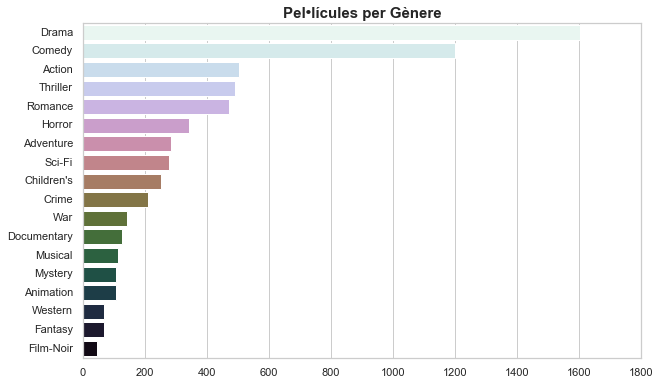

In [620]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=pelis_per_genere.values, y=pelis_per_genere.index, 
           ax=ax, orient ='h', palette = 'cubehelix_r');

plt.title('Pel•lícules per Gènere', fontweight = 'bold', size = 15); 

### <span style=color:purple>Número de gèneres per película </span>

In [621]:
movies['num_generes']= movies.iloc[:, 3:].sum(axis=1)
movies.head()

,Títol,Gènere,Any,War,Action,Animation,Mystery,Comedy,Drama,Film-Noir,...,Fantasy,Sci-Fi,Romance,Documentary,Adventure,Musical,Horror,Thriller,Crime,num_generes
0,Toy Story,Animation|Children's|Comedy,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,Jumanji,Adventure|Children's|Fantasy,1995,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,3
2,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,2
3,Waiting to Exhale,Comedy|Drama,1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2
4,Father of the Bride Part II,Comedy,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [622]:
movies_by_genere = movies.groupby('num_generes')['Títol'].count()
movies_by_genere

num_generes
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: Títol, dtype: int64

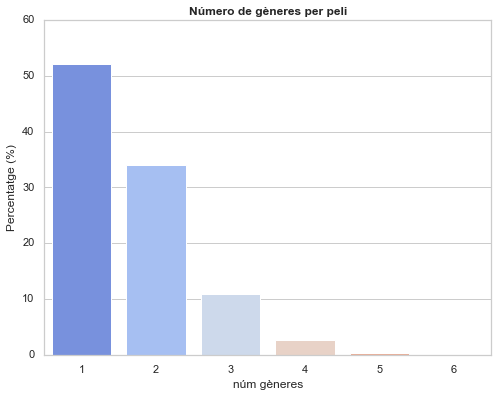

In [623]:
percent_genere = (movies_by_genere / movies_by_genere.sum())*100


fig,ax = plt.subplots(figsize=(8,6))

x = percent_genere.index
y = percent_genere.values

sns.barplot(x = x, y=y, ax=ax, palette = 'coolwarm')
plt.title('Número de gèneres per peli', fontweight = 'bold')
ax.set_xlabel('núm gèneres')
ax.set_ylabel('Percentatge (%)')
plt.show()

### <span style=color:purple>Evolució del número de gèneres vs. anys </span>

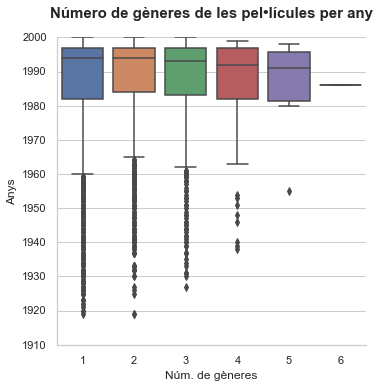

In [624]:
ax = sns.catplot(y='Any', x='num_generes', kind='box',
                 data=movies)

ax.set(xlabel = 'Núm. de gèneres', ylabel = 'Anys')
plt.ticklabel_format(axis="y", style="plain", useOffset = False)
plt.title("Número de gèneres de les pel•lícules per any",
                  fontsize=15, fontdict={"weight": "bold"}, pad = 20);

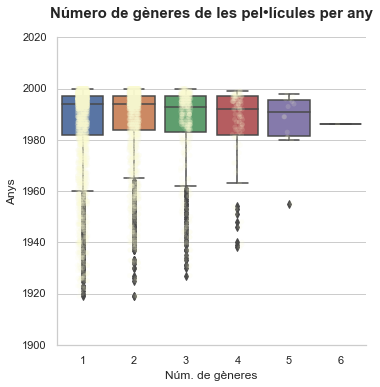

In [625]:
ax = sns.catplot(y='Any', x='num_generes', kind='box',
                 data=movies)


plt.ticklabel_format(axis="y", style="plain", useOffset = False)
plt.title("Número de gèneres de les pel•lícules per any",
                  fontsize=15, fontdict={"weight": "bold"}, pad = 20)


ax = sns.stripplot(y='Any', x='num_generes', data=movies, color='lightgoldenrodyellow', alpha= 0.15)

ax.set(xlabel = 'Núm. de gèneres', ylabel = 'Anys');